Version 1.6, 14 May 2024

STORM Track dataset details: 

https://www.nature.com/articles/s41597-020-0381-2

https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d

https://data.4tu.nl/articles/STORM_IBTrACS_present_climate_synthetic_tropical_cyclone_tracks/12706085?file=24876980

The 10,000 year TC STORM dataset, based on the present climate, is publicly accessible and can be found on the 4TU.Centre for Research Data repository (https://doi.org/10.4121/uuid:82c1dc0d-5485-43d8-901a-ce7f26cda35d). The dataset is split in separate files per basin, with each .txt-file containing 1,000 years of simulations (i.e. 10 files per basin). Each .txt-file consists of a series of arrays, with each array being a single time step (3-hourly) for a synthetic TC. The colmns of the arrays are given in this table:

Image
Bloemendaal, Nadia; Haigh, I.D. (Ivan); de Moel, H. (Hans); Muis, S; Haarsma, R.J. (Reindert) et. al. (2022): STORM IBTrACS present climate synthetic tropical cyclone tracks. Version 4. 4TU.ResearchData. dataset. https://doi.org/10.4121/12706085.v4

Bloemendaal, Nadia; de Moel, H. (Hans); Martinez, Andrew B.; Muis, S. (Sanne); Haigh, I.D. (Ivan) et. al. (2023): STORM Climate Change synthetic tropical cyclone tracks. Version 2. 4TU.ResearchData. dataset. https://doi.org/10.4121/14237678.v2

In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import cheer_utils
import importlib
importlib.reload(cheer_utils)
print(cheer_utils.__doc__)


from scipy import interpolate as sci
#from scipy.interpolate import RBFInterpolator

# pd.options.mode.copy_on_write = True

## https://visibleearth.nasa.gov/collection/1484/blue-marble
## https://neo.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG
#os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/static"



    CHEER_UTILS
    utilities for CHEER-STORM
    from repo for codes/processing of STORM datasets for CHEER
    Version 1.6, 13 May 2024
    GitHub Repo: git@github.com:BrianOBlanton/CHEER-STORM.git
    Brian Blanton, RENCI



In [2]:
# define dicts for filtering circles for case study areas:
a=np.arange(0,370,10)*np.pi/180
rad=5
lo=-71.5
la=33.75
# test track screening circle
# rad= .3
# lo=-77.75
# la=35
nc_circ={'lo': lo,
         'la': la, 
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}

rad=3
lo=-94
la=29.5
tx_circ={'lo': lo,
         'la':  la,
         'rad': rad,
         'cirx': rad*np.cos(a)+lo,
         'ciry': rad*np.sin(a)+la}


dlo, dla = 5, 5
ext={ 0: [tx_circ['lo']-dlo, tx_circ['lo']+dlo, tx_circ['la']-dla, tx_circ['la']+dla],
      1: [nc_circ['lo']-dlo, nc_circ['lo']+dlo, nc_circ['la']-dla, nc_circ['la']+dla]}


In [3]:
# define some plotting vars
makeplots=True
writeoutputfiles=False
# marker size
sz=20

## Load IBTRaCS
## converts units to MKS
### Parameters to LoadIBTrACS:

- minyear: delete tracks < minyear
- maxyear: delete tracks > maxyear

In [17]:
df_ib=cheer_utils.LoadIBTrACS(minyear=1980, maxyear=2017)
df_ib

/home/bblanton/GitHub/BrianOBlanton/CHEER-STORM/cheer_utils.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['abssn'].loc[idx]=i


,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land,NATURE,USA_ATCF_ID,SID,USA_STATUS
abssn,,,,,,,,,,,,,,,
485,1980,7,17,0,NA,30.5000,-76.5000,NaN,10.288880,NaN,390,TS,AL011980,1980199N31284,TD
485,1980,7,17,3,NA,30.3428,-76.8528,NaN,11.317768,NaN,382,TS,AL011980,1980199N31284,TD
485,1980,7,17,6,NA,30.2000,-77.2000,NaN,12.861100,NaN,371,TS,AL011980,1980199N31284,TD
485,1980,7,17,9,NA,30.0845,-77.5549,NaN,12.861100,NaN,332,TS,AL011980,1980199N31284,TD
485,1980,7,17,12,NA,30.0000,-78.0000,NaN,12.861100,NaN,294,TS,AL011980,1980199N31284,TD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,2017,11,9,0,NA,41.8000,-48.8000,991.0,23.149980,129.64,637,TS,AL192017,2017309N26308,TS
1068,2017,11,9,3,NA,42.6851,-48.4599,992.0,21.606648,148.16,569,TS,AL192017,2017309N26308,TS
1068,2017,11,9,6,NA,43.6000,-48.0000,993.0,20.577760,166.68,525,DS,AL192017,2017309N26308,LO


In [ ]:
# show complete track for storm with largest RMW
# print(df_ib['RMW'].max())
# df_ib.loc[df_ib.RMW.idxmax()]

In [ ]:
# further screening of df
#df_ib=df_ib.loc[(df_ib['NATURE']=='TS')]
# & (df['Min_pres'] <= 980)]

## load STORM dataset
## default is to read first 1000 yrs of present climate
### Parameters to LoadSTORMtracks:
- basin='NA' 
- ensnum=0
- climate='current'
- model='present'
- version='_V4'
- nyears=None
- startingyear=None

In [5]:
nyears="all"
df_st=cheer_utils.LoadSTORMtracks() # nyears=nyears)
df_st

Reading STORM tracks from https://tdsres.apps.renci.org/thredds/fileServer/datalayers/STORM_Bloemendaal_data/present_V4/STORM_DATA_IBTRACS_NA_1000_YEARS_0.txt


,Year,Month,Day,Hour,Basin_ID,Latitude,Longitude,Min_pres,MaxWindSpd,RMW,Dist2land
abssn,,,,,,,,,,,
1,0.0,10.0,1.0,0.0,1.0,8.9,-45.2,993.946699,20.371998,46.299999,851.946656
1,0.0,10.0,1.0,3.0,1.0,9.0,-45.7,992.800000,21.200000,45.905957,815.967429
1,0.0,10.0,1.0,6.0,1.0,9.1,-46.4,992.100000,21.700000,45.511914,766.103506
1,0.0,10.0,1.0,9.0,1.0,9.2,-47.3,993.000000,21.100000,45.117872,705.759651
1,0.0,10.0,1.0,12.0,1.0,9.3,-48.3,993.100000,20.900000,44.723829,647.548285
...,...,...,...,...,...,...,...,...,...,...,...
10522,999.0,8.0,1.0,9.0,1.0,24.8,-88.5,990.300000,23.600000,92.599998,354.551796
10522,999.0,8.0,1.0,12.0,1.0,25.4,-89.2,992.000000,22.400000,92.599998,391.816444
10522,999.0,8.0,1.0,15.0,1.0,26.1,-89.9,990.000000,23.900000,92.599998,317.926065


## Add distance to sites, Delta P, and Holland-B

In [18]:
df_ib['dist2nc']=np.sqrt(np.square(df_ib['Longitude']-nc_circ['lo']) + np.square(df_ib['Latitude']-nc_circ['la']))
df_ib['dist2tx']=np.sqrt(np.square(df_ib['Longitude']-tx_circ['lo']) + np.square(df_ib['Latitude']-tx_circ['la']))
df_ib['HollandB']=cheer_utils.HbFromRmwLat(df_ib['RMW'],df_ib['Latitude'])
df_ib['DeltaP']=-(df_ib['Min_pres']-1024)

df_st['dist2nc']=np.sqrt(np.square(df_st['Longitude']-nc_circ['lo']) + np.square(df_st['Latitude']-nc_circ['la']))
df_st['dist2tx']=np.sqrt(np.square(df_st['Longitude']-tx_circ['lo']) + np.square(df_st['Latitude']-tx_circ['la']))
df_st['HollandB']=cheer_utils.HbFromRmwLat(df_st['RMW'],df_st['Latitude'])
df_st['DeltaP']=-(df_st['Min_pres']-1013)

## Apply "spatial" screening for study sites

In [19]:
df_ib_nc=df_ib.loc[(df_ib['dist2nc'] <= nc_circ['rad'])] #  & (df_ib['NATURE']=='TS')]
df_st_nc=df_st.loc[(df_st['dist2nc'] <= nc_circ['rad'])]

In [20]:
# extract genesis locations
ib_glo=[]
ib_gla=[]
ib_gdp=[]

IDX=np.unique(df_ib.index).astype(int)
    
for i,idx in enumerate(IDX): 
    ib_glo.append(df_ib.loc[df_ib.index==idx].Longitude.values[0])
    ib_gla.append(df_ib.loc[df_ib.index==idx].Latitude.values[0])
    ib_gdp.append(df_ib.loc[df_ib.index==idx].DeltaP.values[0])
    
    
st_glo=[]
st_gla=[]
st_gdp=[]

IDX=np.unique(df_st.index).astype(int)
    
for i,idx in enumerate(IDX): 
    st_glo.append(df_st.loc[df_st.index==idx].Longitude.values[0])
    st_gla.append(df_st.loc[df_st.index==idx].Latitude.values[0])
    st_gdp.append(df_st.loc[df_st.index==idx].DeltaP.values[0])

data = {'Longitude': ib_glo, 'Latitude': ib_gla, 'DeltaP': ib_gdp}
df_ib_g=pd.DataFrame.from_dict(data)
data = {'Longitude': st_glo, 'Latitude': st_gla, 'DeltaP': st_gdp}
df_st_g=pd.DataFrame.from_dict(data)

## Track density plots

0.0 8.0
0.0 87.0
8.0 0.9030899869919435 1.0
87.0 1.9395192526186185 2.0
vmin0,vmax0=(0, 1)
vmin1,vmax1=(0, 1)


Text(0.5, 0.85, 'Genesis Track Position Density')

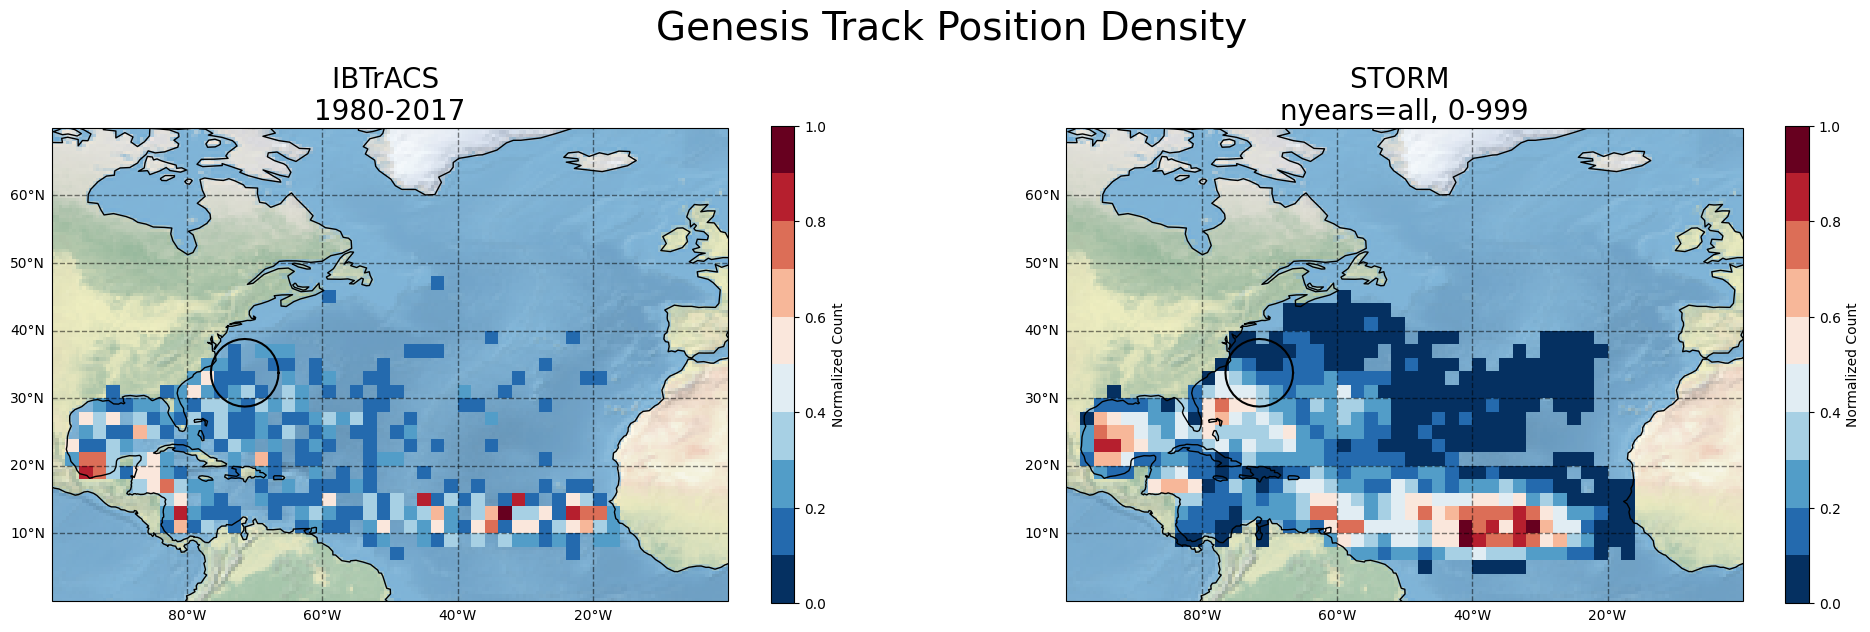

In [21]:
# generate a grid for histogram2d
lo0=-100
lo1=0
la0=0
la1=70
dx,dy=2,2

lon_bins=np.arange(lo0,lo1,dx)
lat_bins=np.arange(la0,la1,dy)

density=False
log10=False
normalized_count=True
cmapName='RdBu_r'

temp=df_ib_g
density_ib,      _,      _ = np.histogram2d(temp.Longitude,temp.Latitude, bins=(lon_bins,lat_bins), density=density)
temp=df_st_g
density_st, xedges, yedges = np.histogram2d(temp.Longitude,temp.Latitude, bins=(lon_bins,lat_bins), density=density)
print(density_ib.min(),density_ib.max())
print(density_st.min(),density_st.max())
nc=10

if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(24,10), sharey=True)
  
    if density:
        
        cbstr='Point density (n/N/area)'
        
        tol=1e-4

        tempib=np.where(density_ib.T < tol, np.nan, density_ib.T)
        tempst=np.where(density_st.T < tol, np.nan, density_st.T)

        if log10:
            
            vmin0, vmax0 = -4, -2.8
            vmin1, vmax1 = vmin0, vmax0
            nc=12
            tempib=np.log10(tempib)
            tempst=np.log10(tempst)
            cbstr=f'log10 ({cbstr})'
            
        else:
            
            vmin0, vmax0 = tol, 1e-3
            vmin1, vmax1 = vmin0, vmax0
            nc=10
            
    else:
        
        cbstr='Count'
        nc=10
        
        tempib=density_ib.T.copy()
        tempst=density_st.T.copy()
        
        tempib=np.where(tempib < 1, np.nan, tempib)
        tempst=np.where(tempst < 1, np.nan, tempst)
        
        print(np.nanmax(tempib),np.log10(np.nanmax(tempib)),np.ceil(np.log10(np.nanmax(tempib))))
        print(np.nanmax(tempst),np.log10(np.nanmax(tempst)),np.ceil(np.log10(np.nanmax(tempst))))

        if normalized_count:
            tempib=tempib/np.nanmax(tempib)
            tempst=tempst/np.nanmax(tempst)
            cbstr=f'Normalized {cbstr}'
            vmin0,vmax0 = 0, 1
            vmin1,vmax1 = 0, 1

        else:
            vmin0, vmax0 = 0, np.power(10,np.ceil(np.log10(np.nanmax(tempib))))
            vmin1, vmax1 = 0, np.power(10,np.ceil(np.log10(np.nanmax(tempst))))
            # vmin0,vmax0 = 0, 100
            # vmin1,vmax1 = 0, 500
            vmin0,vmax0 = 0, 20
            vmin1,vmax1 = 0, 100            
            
    print(f'vmin0,vmax0={vmin0,vmax0}')
    print(f'vmin1,vmax1={vmin1,vmax1}')
    
    tstr=[f'IBTrACS \n{df_ib["Year"].min()}-{df_ib["Year"].max()}',
          f'STORM \nnyears={nyears}, {int(df_st["Year"].min())}-{int(df_st["Year"].max())}']
        
    ThisCmap=cheer_utils.discrete_cmap(nc, cmapName)

    axm=[]
    axm.append(ax[0].pcolormesh(lon_bins, lat_bins, tempib, cmap=ThisCmap, vmin=vmin0, vmax=vmax0)) 
    axm.append(ax[1].pcolormesh(lon_bins, lat_bins, tempst, cmap=ThisCmap, vmin=vmin1, vmax=vmax1)) 

    # hex grid
    # axm.append(ax[0].hexbin(df_gib.Longitude,df_gib.Latitude, cmap=ThisCmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 
    # axm.append(ax[1].hexbin(df_gst.Longitude,df_gst.Latitude, cmap=ThisCmap, bins='log' )) # ,  vmin=vmin, vmax=vmax) 

    for i in range(0,2):
        #ax[i].axis('equal')
        ax[i].set_ylim([la0, la1])
        ax[i].set_xlim([lo0, lo1])
        ax[i].grid(True)
        ax[i].set_aspect(1.0/np.cos(np.mean(lat_bins) * np.pi / 180.0))
        cb=fig.colorbar(axm[i], ax=ax[i], shrink=0.62)
        cb.ax.set_ylabel(cbstr)
        ax[i].stock_img()
        #ax[i].background_img(name='BM', resolution='low')

        ax[i].coastlines()
        ax[i].set_title(tstr[i],fontsize=20)
        gl=ax[i].gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False
        
    ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree(),color='k')
    ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree(),color='k')
    
fig.suptitle("Genesis Track Position Density",fontsize=28,y=0.85)
#fig.suptitle("Genesis Locations",fontsize=28,y=0.85)
#fig.save("Genesis_Locations.png")

In [ ]:
importlib.reload(cheer_utils)
norm = mpl.colors.Normalize(vmin=0, vmax=100)

if makeplots:

    fig, ax = plt.subplots(nrows=1,ncols=2,
                           subplot_kw={'projection': ccrs.PlateCarree()},
                           figsize=(16,7))
    ax=ax.flatten()
    
    ax[0].stock_img()
    ax[0].coastlines()
    ax[1].stock_img()
    ax[1].coastlines()
    
#     ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['cirx'],tx_circ['ciry'],transform=ccrs.PlateCarree())

#     ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
#     ax[1].plot(tx_circ['lo'],tx_circ['la'],marker='*',transform=ccrs.PlateCarree())

    for i in range(0,2):
        ax[i].axis('equal')
        ax[i].set_ylim([10, 50])
        ax[i].set_xlim([-120, 0])
        ax[i].grid(True)

cheer_utils.TrackPlot(df_ib, axx=ax[0], addcolorbar=True, norm=norm)
cheer_utils.TrackPlot(df_st, axx=ax[1], addcolorbar=True, norm=norm)

In [ ]:
print(df_ib_nc.shape)
print(df_st_nc.shape)

Text(0.5, 1.0, 'STORM')

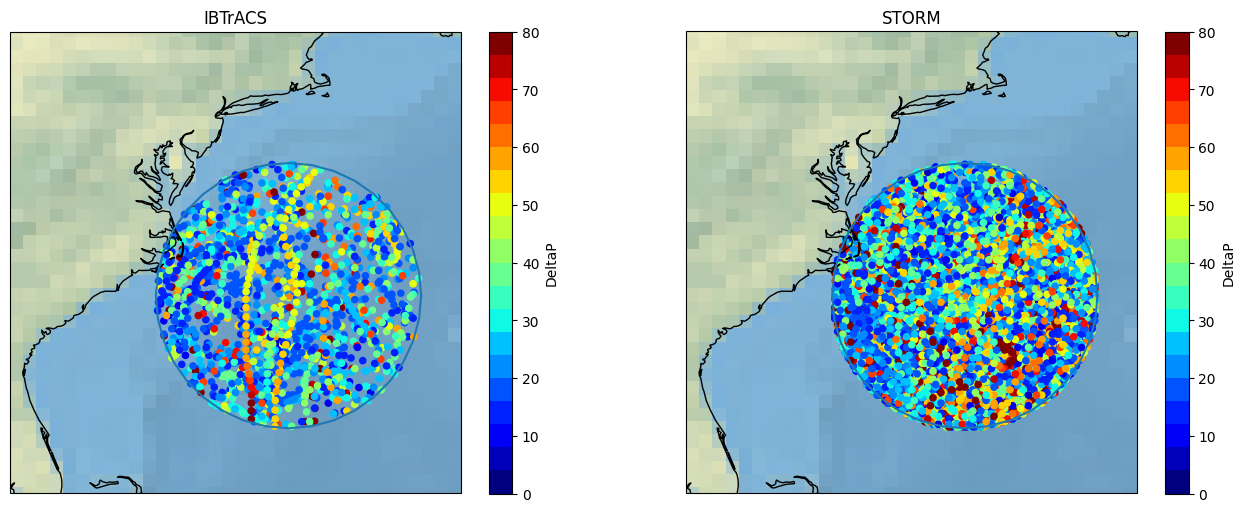

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,6))
ax=ax.flatten()

ax[0].stock_img()
ax[0].coastlines()
ax[1].stock_img()
ax[1].coastlines()

ax[0].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['cirx'],nc_circ['ciry'],transform=ccrs.PlateCarree())

ax[0].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())
ax[1].plot(nc_circ['lo'],nc_circ['la'],marker='*',transform=ccrs.PlateCarree())

cmap=cheer_utils.discrete_cmap(20, 'jet')

for i in range(0,2):
    ax[i].axis('equal')
    ax[i].set_ylim([30, 40])
    ax[i].set_xlim([-82, -65])
    ax[i].grid(True)

df_ib_nc.plot.scatter(
            x='Longitude',
            y='Latitude',
            c='DeltaP',
            ax=ax[0],vmin=0,vmax=80,cmap=cmap)
df_st_nc.plot.scatter(
            x='Longitude',
            y='Latitude',
            c='DeltaP',
            ax=ax[1],vmin=0,vmax=80,cmap=cmap)

ax[0].set_title('IBTrACS')
ax[1].set_title('STORM')

Text(0.5, 1.0, 'STORM DeltaP')

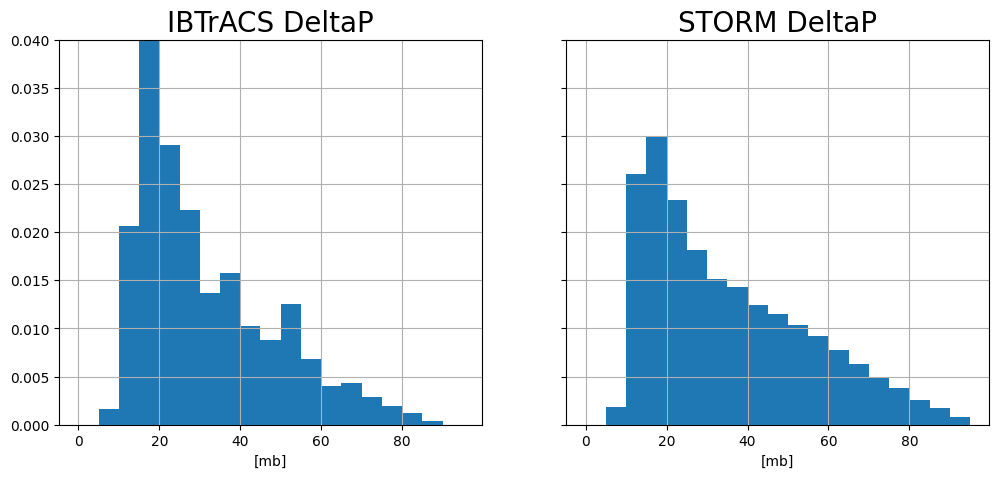

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,
                       figsize=(12,5),sharey=True)
k='DeltaP'
i=2
axx=(df_ib_nc[k]).hist(ax=ax[0], density=True, bins=range(0,100,5))
#axx=((df_ib[k])).hist(ax=ax[0], density=True, bins=range(900,1020,10))
axx.set_ylim([0, .040])
axx.set_xlabel('[mb]')
ax[0].set_title(f'IBTrACS {k}',fontsize=20)

i=3
axx=(df_st_nc[k]).hist(ax=ax[1],density=True, bins=range(0,100,5))
#axx=((df_st['RMW'])).hist( ax=ax[1],density=True, bins=range(900,1020,10))
axx.set_ylim([0, .040])
axx.set_xlabel('[mb]')
ax[1].set_title(f'STORM {k}',fontsize=20)

In [ ]:
pd.cut(df_ib_nc.DeltaP, bins=10)

36.0
27.842145666999954


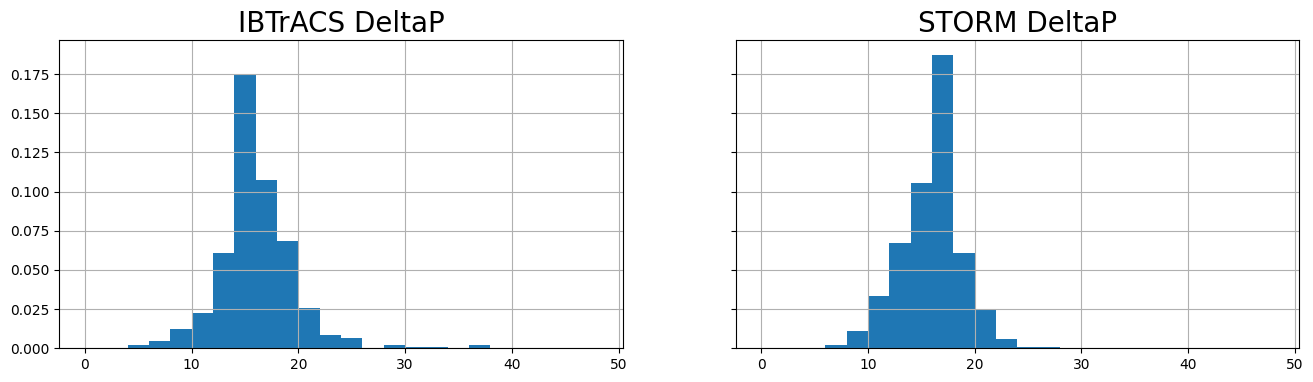

In [24]:
#genesis  dp
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4), sharey=True) 

ax=ax.flatten()

k='DeltaP'
i=0
axx=((df_ib_g[k])).hist(ax=ax[i], density=True, bins=range(0,50,2))
#axx=((df_ib[k])).hist(ax=ax[0], density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title(k,fontsize=20)
ax[i].set_title(f'IBTrACS {k}',fontsize=20)

i=1
axx=((df_st_g[k])).hist(ax=ax[i],density=True, bins=range(0,50,2))
#axx=((df_st['RMW'])).hist( ax=ax[1],density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title(f'STORM {k}',fontsize=20)

print(df_ib_g[k].max())
print(df_st_g[k].max())


89.0
112.29999999999995
277.8
444.480010986


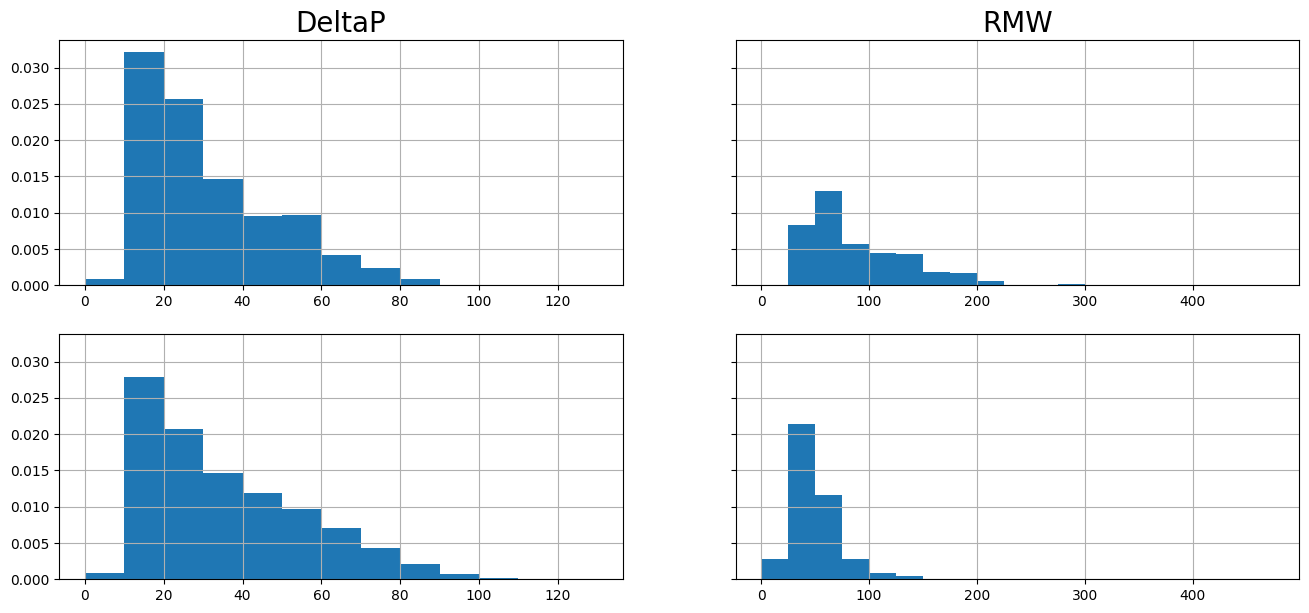

In [25]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,7), sharey=True) 

ax=ax.flatten()

k='DeltaP'
i=0
axx=((df_ib_nc[k])).hist(ax=ax[i], density=True, bins=range(0,140,10))
#axx=((df_ib[k])).hist(ax=ax[0], density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title(k,fontsize=20)

i=2
axx=((df_st_nc[k])).hist(ax=ax[i],density=True, bins=range(0,140,10))

#axx=((df_st['RMW'])).hist( ax=ax[1],density=True, bins=range(900,1020,10))
#axx.set_ylim([0, .040])
#axx.set_xlabel(k)
ax[i].set_title('')

print(df_ib_nc[k].max())
print(df_st_nc[k].max())

k='RMW'
i=1
axx=((df_ib_nc[k])).hist(ax=ax[i], density=True, bins=range(0,500,25))
#axx.set_ylim([0, .012])
#axx.set_xlabel(k)
ax[i].set_title(k,fontsize=20)

i=3
axx=((df_st_nc[k])).hist(ax=ax[i],density=True, bins=range(0,500,25))
#axx.set_ylim([0, .012])
#axx.set_xlabel(k)

print(df_ib_nc[k].max())
print(df_st_nc[k].max())

In [ ]:
from scipy import stats
stats.ks_2samp(df_ib_nc[np.isfinite(df_ib_nc['DeltaP'])].DeltaP, df_st_nc[np.isfinite(df_st_nc['DeltaP'])].DeltaP)

# "NC" KstestResult(statistic=0.08930426008821235, pvalue=4.81719351118903e-15, statistic_location=42.0, statistic_sign=1)
# all  KstestResult(statistic=0.1622379043492559, pvalue=0.0, statistic_location=24.0, statistic_sign=1)

In [ ]:
df_ib_nc[np.isfinite(df_ib_nc['DeltaP'])].DeltaP

In [ ]:
df_ib[df_ib["RMW"] > 35]

### interp experiments below.  not sorted out

In [ ]:

x_i, y_i = np.meshgrid(np.linspace(-100, -60, 80), np.linspace(10, 50, 80))
print(x_i.shape)
xy_i = np.concatenate([x_i.reshape(-1, 1), y_i.reshape(-1, 1)], axis=1)

# grid_x, grid_y = np.meshgrid(np.linspace(-90, -60, 20),
#                              np.linspace(10, 40, 20))
# xy_i = np.concatenate([grid_x, grid_y], axis=1)


In [ ]:
z=np.array(df_ib.Min_pres.values)
x = df_ib.Longitude.values
x = x[np.isfinite(z)] 
y = df_ib.Latitude.values
y = y[np.isfinite(z)] 
values = z[np.isfinite(z)] 

stride=10

x=x[::stride]
y=y[::stride]
values=values[::stride]

points=np.array([x,y]).T


print(x.shape)
print(values.shape)

In [ ]:
rbf = RBFInterpolator(points, values, kernel='gaussian',epsilon=2, smoothing=0.5)
z_i = rbf(xy_i).reshape(x_i.shape).T
z_i.shape

fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(6,6), dpi=100) # , sharey=True)
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))

axm=ax.contourf(x_i,y_i,z_i, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])


In [ ]:
model_rbf = sci.Rbf(x,y,values, smooth=1, degree=1, function='gaussian')

In [ ]:
Z_rbf = model_rbf(x_i, y_i)
vmin=880
vmax=1025
fig, ax = plt.subplots(nrows=1, ncols=1 , figsize=(12,12), dpi=100) # , sharey=True)

axm=ax.contourf(x_i,y_i,Z_rbf, cmap=cheer_utils.cmap,  vmin=vmin, vmax=vmax) 
#  , levels=levels, norm=norm) #
ax.set_aspect(1.0/np.cos(np.mean(y) * np.pi / 180.0))
#axm=ax.scatter(x, y, 50, values, marker='o', cmap=cheer_utils.cmap,  edgecolors='k', vmin=vmin, vmax=vmax) # , norm=norm) #   
#ax.set_title(t)
fig.colorbar(axm, ax=ax, shrink=.85)
ax.plot(cheer_utils.coastline[:,0],cheer_utils.coastline[:,1],color='k',linewidth=1)
ax.set_xlim([-100-12, -40])
ax.set_ylim([5, 55])

print(np.min(values),np.max(values))
print(np.min(Z_rbf),np.max(Z_rbf))
print(Z_rbf.shape)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(16,7))

ax.stock_img()
ax.coastlines()

plt.pcolor(grid_x,grid_y,z_i, )

ax.axis('equal')
ax.set_ylim([10, 50])
ax.set_xlim([-100, -50])
ax.grid(True)

In [ ]:
rng = np.random.default_rng()
points = rng.random((1000, 2))

In [ ]:
rng = np.random.default_rng()
xy = rng.random((100, 2))*4.0-2.0
z = xy[:, 0]*np.exp(-xy[:, 0]**2-xy[:, 1]**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
x_i, y_i = np.meshgrid(centers, centers)
x_i = x_i.reshape(-1, 1)
y_i = y_i.reshape(-1, 1)
xy_i = np.concatenate([x_i, y_i], axis=1)
rbf = RBFInterpolator(xy, z, epsilon=2)

In [ ]:
ib_yc=[]
st_yc=[]
for y in np.unique(df_ib.Year):
    i = df_ib.loc[(df_ib['Year'] == y)] 
    ib_yc.append(np.unique(i.index).shape[0])
for y in np.unique(df_st.Year):
    i = df_st.loc[(df_st['Year'] == y)] 
    st_yc.append(np.unique(i.index).shape[0])

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,7),sharex=True, sharey=True)

ax[0].hist(ib_yc, density=True)
ax[1].hist(st_yc, density=True)

ax[0].grid(True)
ax[1].grid(True)